### Name: 陳昱丞
### Student ID: 0716206

Data Input and Data Preprocessing:

將data下載下來並shuffle，接著將所有feature和target轉成數字。最後轉成np array方便之後當成參數傳進model。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

train_data = pd.read_json('train.json')
train_data = shuffle(train_data)

target=[]
feature=[]

for i in range(29774):
    target.append(train_data.iloc[i]['cuisine'])
    li = train_data.iloc[i]['ingredients']
    for l in li:
        feature.append(l)

target_unique=list(set(target))
feature_unique=list(set(feature))
target_class=[]
feature_ingredients=[]
for i in range(29774):
    for j in range(len(target_unique)):
        if train_data.iloc[i]['cuisine'] == target_unique[j]:
            target_class.append(j)
            break
    
    li = train_data.iloc[i]['ingredients']
    a=[0]*6231
    for j in range(len(feature_unique)):
        if feature_unique[j] in li:
            a[j]=1
    
    feature_ingredients.append(a)
    
target_class = np.array(target_class)    
feature_ingredients = np.array(feature_ingredients)

Model Construction:

先將feature和target做7:3的train test split，接著丟進sklearn的SVC model。我採用的kernel是linear和rbf。

In [2]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(feature_ingredients,target_class,test_size=0.3)

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [5]:
svm = SVC(kernel='linear', probability=True)
svm = svm.fit(X_train_std,Y_train)

In [6]:
svm_predict = svm.predict(X_test_std)

In [7]:
print(confusion_matrix(Y_test, svm_predict))

[[  41    7    5    1   13    5    0    0    2    0    3    4    1   11
     0    6    2   10   11    2]
 [   2   90   20    2   17    2    1    1    8    1    8   13    2   36
     3    4    3   10    5    2]
 [   7   44 1210    7   30   11    4    5   19    4    4    8    4   21
     1    3   19    8    2    8]
 [   1    4    8   66    8    6    2    1    2    0    1    0    1    4
     0    2    6    3    0    4]
 [  20   21   33    7  631    9    3    3    9    5    6    4   15   46
     0   29   11   30   15   55]
 [   2    5    5    5    4   85   16    6    4   10    2    0    5    4
     7    1    2    1    1    1]
 [   3    2    6    2    7   24  431   15    1   16    4    1   28    2
    21    0    3    2    0    5]
 [   0    1    7    3    3    3   34  237    3   26    0    1    5    4
     4    0   13    0    0    0]
 [   3    6    7    4    5    9    2    2   59    1    0    0    0    5
     0    1    3    3    0    0]
 [   0    2   11    1    2   13   22   53    3   82    

In [8]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, svm_predict, target_names=target_unique))

              precision    recall  f1-score   support

     russian       0.29      0.33      0.31       124
     spanish       0.27      0.39      0.32       230
     mexican       0.83      0.85      0.84      1419
    jamaican       0.52      0.55      0.54       119
 southern_us       0.66      0.66      0.66       952
    filipino       0.42      0.51      0.46       166
     chinese       0.72      0.75      0.73       573
        thai       0.66      0.69      0.68       344
   brazilian       0.43      0.54      0.48       110
  vietnamese       0.43      0.41      0.42       202
    moroccan       0.56      0.68      0.62       198
       greek       0.57      0.71      0.63       268
    japanese       0.62      0.62      0.62       320
     italian       0.79      0.71      0.75      1748
      korean       0.62      0.62      0.62       183
     british       0.37      0.37      0.37       187
      indian       0.79      0.76      0.78       685
      french       0.57    

In [9]:
svm2 = SVC(kernel='rbf', gamma='scale', probability=True)
svm2 = svm2.fit(X_train_std,Y_train)

In [10]:
svm2_predict = svm2.predict(X_test_std)

In [11]:
print(confusion_matrix(Y_test, svm2_predict))

[[  12    0    4    0   25    0    0    0    0    0    0    0    0   68
     0    1    1   13    0    0]
 [   0   35   29    0   20    0    1    1    0    0    2    1    0  122
     0    0    5   12    0    2]
 [   2    1 1243    0   47    0    4    0    0    1    0    1    0  107
     0    0    2    5    0    6]
 [   0    0   17   41   25    0    0    0    0    0    0    0    0   24
     0    0   10    1    1    0]
 [   1    0   38    0  707    0    2    3    0    0    0    1    0  156
     0    0    5   21    2   16]
 [   0    0   19    1   13   40   21    3    0    2    1    0    1   58
     1    0    5    1    0    0]
 [   0    0   20    0   15    4  450    9    0    1    1    0    6   58
     2    0    2    4    0    1]
 [   0    0   15    0    7    1   41  221    1    5    0    0    3   43
     0    0    7    0    0    0]
 [   0    0   24    0   17    0    2    0   24    0    0    0    0   36
     0    0    3    4    0    0]
 [   0    0   21    0    6    6   22   52    0   44    

In [12]:
print(classification_report(Y_test, svm2_predict, target_names=target_unique))

              precision    recall  f1-score   support

     russian       0.71      0.10      0.17       124
     spanish       0.81      0.15      0.26       230
     mexican       0.80      0.88      0.84      1419
    jamaican       0.93      0.34      0.50       119
 southern_us       0.58      0.74      0.65       952
    filipino       0.73      0.24      0.36       166
     chinese       0.70      0.79      0.74       573
        thai       0.73      0.64      0.69       344
   brazilian       0.89      0.22      0.35       110
  vietnamese       0.81      0.22      0.34       202
    moroccan       0.86      0.48      0.61       198
       greek       0.85      0.45      0.59       268
    japanese       0.89      0.50      0.64       320
     italian       0.51      0.93      0.66      1748
      korean       0.93      0.38      0.54       183
     british       0.83      0.13      0.22       187
      indian       0.82      0.78      0.80       685
      french       0.62    

Results:

使用confusoin_matrix和classification_report來獲得結果。

接著丟進sklearn.neural_network中的MLPClassifier來做ANN的model construction。

In [13]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs',random_state=1).fit(X_train_std,Y_train)

In [14]:
nn_predict = clf.predict(X_test_std)

In [15]:
print(confusion_matrix(Y_test, nn_predict))

[[  39    1    4    0   12    2    2    0    2    0    2    5    1   18
     0    9    1   18    6    2]
 [   1   86   18    0   17    2    1    1    4    3    8   11    0   40
     1    1    7   24    3    2]
 [   2   14 1243    1   40   11    2    9    7    5    4    1    3   27
     0    4   12   22    5    7]
 [   0    2    4   76   12    2    0    1    2    0    0    0    0    2
     0    1    9    5    2    1]
 [   7   12   44    9  665    7    5    4    4    2    0    6    7   52
     1   16    9   41   18   43]
 [   4    3    9    2    7   83   16    6    5    7    0    1    6    6
     3    2    3    2    1    0]
 [   0    0    5    1    9   13  435   16    0   21    2    0   25    7
    17    1    3    7    9    2]
 [   0    0    2    5    4    5   40  233    3   26    0    0    6    2
     6    0   12    0    0    0]
 [   0    5    9    1    5    5    4    4   65    0    0    0    0    3
     0    1    2    3    3    0]
 [   1    1    9    0    4   13   24   36    1   83    

In [16]:
print(classification_report(Y_test, nn_predict, target_names=target_unique))

              precision    recall  f1-score   support

     russian       0.45      0.31      0.37       124
     spanish       0.45      0.37      0.41       230
     mexican       0.85      0.88      0.86      1419
    jamaican       0.63      0.64      0.64       119
 southern_us       0.68      0.70      0.69       952
    filipino       0.47      0.50      0.49       166
     chinese       0.74      0.76      0.75       573
        thai       0.68      0.68      0.68       344
   brazilian       0.62      0.59      0.60       110
  vietnamese       0.46      0.41      0.44       202
    moroccan       0.67      0.67      0.67       198
       greek       0.66      0.64      0.65       268
    japanese       0.70      0.68      0.69       320
     italian       0.79      0.79      0.79      1748
      korean       0.70      0.68      0.69       183
     british       0.41      0.40      0.40       187
      indian       0.80      0.81      0.81       685
      french       0.51    

Comparison and Conclusion:

使用sklearn的SVC kernel=linear和rbf從accuracy來看沒有太大的差距，兩者皆為66%。使用sklearn的MLPClassifier整體上都是更好的，accuracy來到70%。

Kaggle Submission:

將test的資料做和上面一樣encoding，轉成數字後丟進MLPClassifier做預測，最後依照sample submission的格式將它輸出。

In [17]:
test_data = pd.read_json('test.json')

In [18]:
feature_ingredients_test=[]
for i in range(10000):
    li = test_data.iloc[i]['ingredients']
    a=[0]*6231
    for j in range(len(feature_unique)):
        if feature_unique[j] in li:
            a[j]=1
    
    feature_ingredients_test.append(a)
feature_ingredients_test = np.array(feature_ingredients_test)

In [19]:
clf = MLPClassifier(solver='lbfgs',random_state=1).fit(feature_ingredients,target_class)
nn_predict = clf.predict(feature_ingredients_test)

In [20]:
out=[]
for i in range(10000):
    ID = test_data.iloc[i]['id']
    category = target_unique[nn_predict[i]]
    out.append([ID,category])

In [21]:
df_result=pd.DataFrame(out)
df_result = df_result.rename(columns={0: 'Id',1: 'Category'})
df_result.to_csv('result.csv')

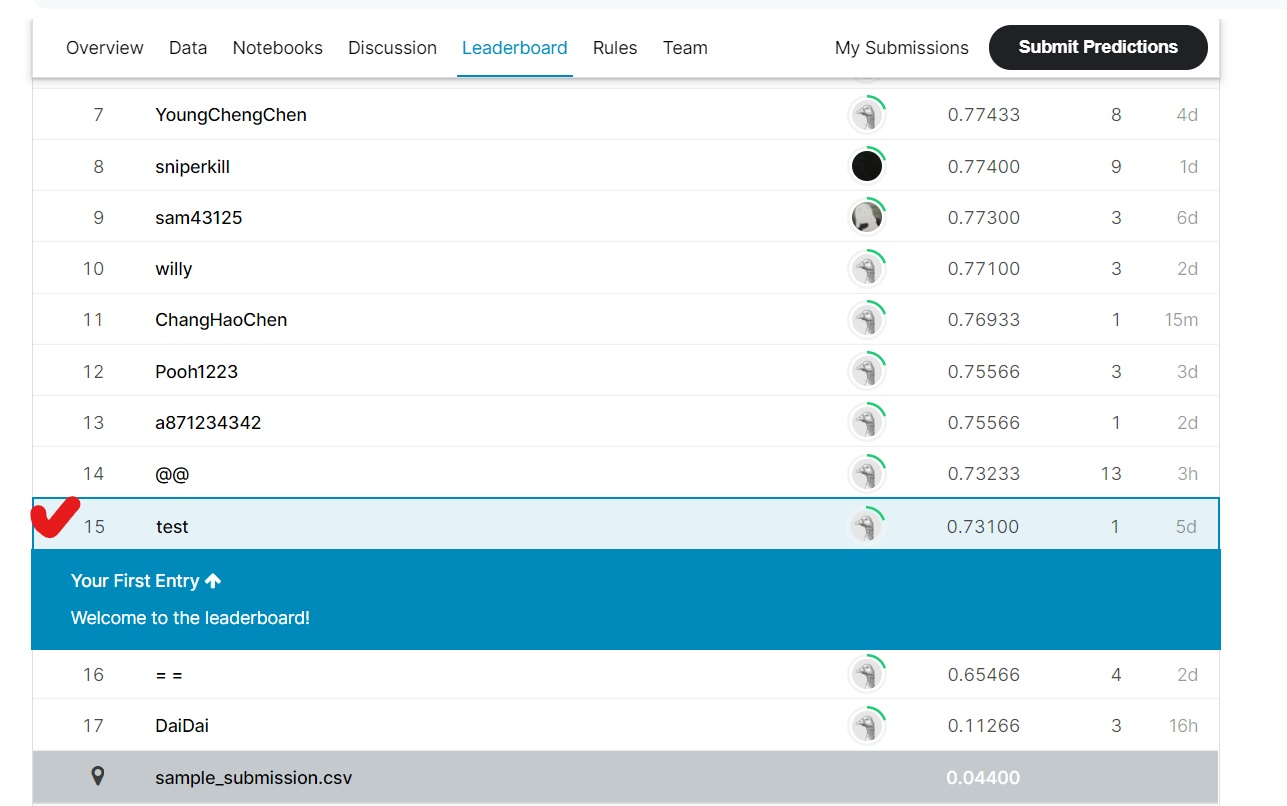